In [18]:
import os

# Change to the parent directory
os.chdir('../..')

# Verify the path using getcwd()
cwd = os.getcwd()
print("Current working directory:", cwd)

Current working directory: c:\Users\onyer\OneDrive\Desktop\Research work


In [19]:
import deepSI
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from src.model_fitting import fit_and_plot_cycle
import src.plotting as ptt
from src.file_loader import load_csv_files
from src.model_fitting import fit_and_plot_cycle
from src.model import arx_model
import sysid_pem_toolbox.sysid_pem as sid
import scipy as sp
import control as ct
import deepSI


In [20]:
# List of file names
file_names = [
    '9171_20240927_N11507060127_ Rapid polarization.csv',
    '9171_20240927_N11507060127_Rapid polarization-1.csv',
    '9171_20241001_N11507060127_ Rapid polarization-2.csv'
    ]

# print(f"Processing file: {file_names}")
dataframes = load_csv_files(file_names, '', 'deep learning assignment')


In [21]:
# Display the first 5 rows of each DataFrame
for key, df in dataframes.items():
    print(f"Head of DataFrame {key}:")
    print(df.head(5))
    print("\n")

Head of DataFrame 9171_20240927_N11507060127__Rapid_polarization_csv:
  Time (HH:mm:ss.SSS)    Channel   CH      V      A
0        11:51:33.361  0.9150142  CH1  1.415  0.046
1        11:51:33.597   1.151406  CH1  1.438  0.046
2        11:51:33.834  1.3879028  CH1   1.45  0.046
3        11:51:34.056  1.6098408  CH1  1.457  0.046
4        11:51:34.291  1.8455329  CH1  1.462  0.046


Head of DataFrame 9171_20240927_N11507060127_Rapid_polarization-1_csv:
  Time (HH:mm:ss.SSS)    Channel   CH      V      A
0        12:37:34.923  0.7860418  CH1   1.29  0.045
1        12:37:35.159  1.0221781  CH1  1.319  0.045
2        12:37:35.393  1.2562979  CH1  1.346  0.045
3        12:37:35.628  1.4910408  CH1  1.373  0.045
4        12:37:35.863  1.7256911  CH1    1.4  0.045


Head of DataFrame 9171_20241001_N11507060127__Rapid_polarization-2_csv:
  Time (HH:mm:ss.SSS)    Channel   CH      V      A
0        11:45:54.513   0.780562  CH1  1.429  0.046
1        11:45:54.753  1.0206133  CH1  1.444  0.046
2  


No missing values in 'Time (HH:mm:ss.SSS)' for 9171_20240927_N11507060127__Rapid_polarization_csv.

Number of missing values in 'V' for 9171_20240927_N11507060127__Rapid_polarization_csv: 27
Rows with missing values:

Number of missing values in 'A' for 9171_20240927_N11507060127__Rapid_polarization_csv: 27
Rows with missing values:

No missing values in 'Time (HH:mm:ss.SSS)' for 9171_20240927_N11507060127_Rapid_polarization-1_csv.

Number of missing values in 'V' for 9171_20240927_N11507060127_Rapid_polarization-1_csv: 51
Rows with missing values:

Number of missing values in 'A' for 9171_20240927_N11507060127_Rapid_polarization-1_csv: 51
Rows with missing values:

No missing values in 'Time (HH:mm:ss.SSS)' for 9171_20241001_N11507060127__Rapid_polarization-2_csv.

Number of missing values in 'V' for 9171_20241001_N11507060127__Rapid_polarization-2_csv: 63
Rows with missing values:

Number of missing values in 'A' for 9171_20241001_N11507060127__Rapid_polarization-2_csv: 63
Rows with

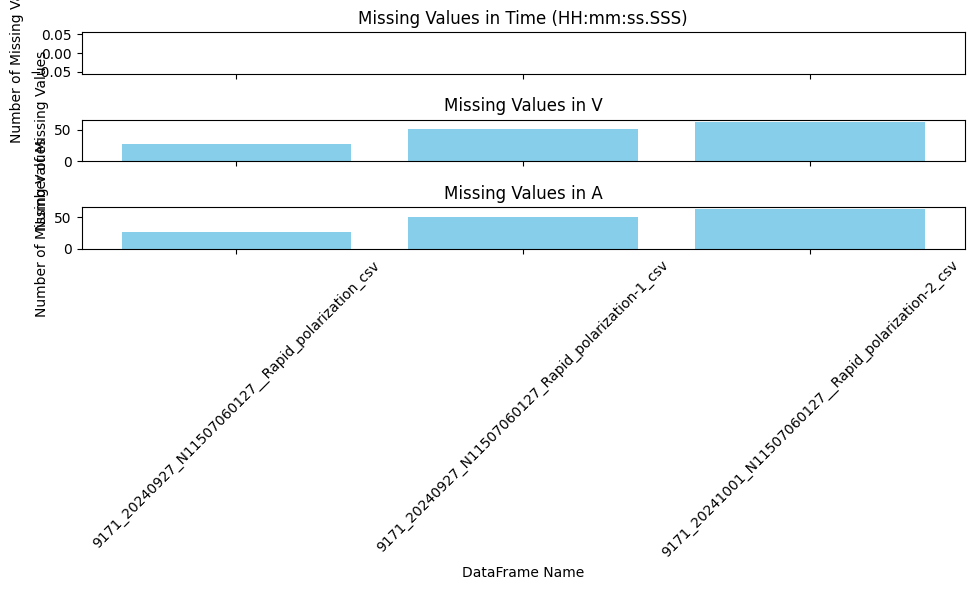

In [22]:
# Columns to check for missing values
COLUMNS_TO_CHECK = ['Time (HH:mm:ss.SSS)', 'V', 'A']

# Initialize a dictionary to store missing values count for each column in each DataFrame
missing_counts = {col: {} for col in COLUMNS_TO_CHECK}

for key, df in dataframes.items():
    # Check for missing values in each column
    for column in COLUMNS_TO_CHECK:
        missing_values = df[column].isna()
        num_missing = missing_values.sum()
        
        # Store the count of missing values for each column in the DataFrame
        missing_counts[column][key] = num_missing
        
        # Display rows with missing values (optional)
        if num_missing > 0:
            print(f"\nNumber of missing values in '{column}' for {key}: {num_missing}")
            print("Rows with missing values:")
        else:
            print(f"\nNo missing values in '{column}' for {key}.")

# Plot missing values count for each column in each DataFrame
fig, axes = plt.subplots(len(COLUMNS_TO_CHECK), 1, figsize=(10, 6), sharex=True)

for i, column in enumerate(COLUMNS_TO_CHECK):
    axes[i].bar(missing_counts[column].keys(), missing_counts[column].values(), color='skyblue')
    axes[i].set_ylabel('Number of Missing Values')
    axes[i].set_title(f'Missing Values in {column}')
    axes[i].tick_params(axis='x', rotation=45)

plt.xlabel('DataFrame Name')
plt.tight_layout()
plt.show()



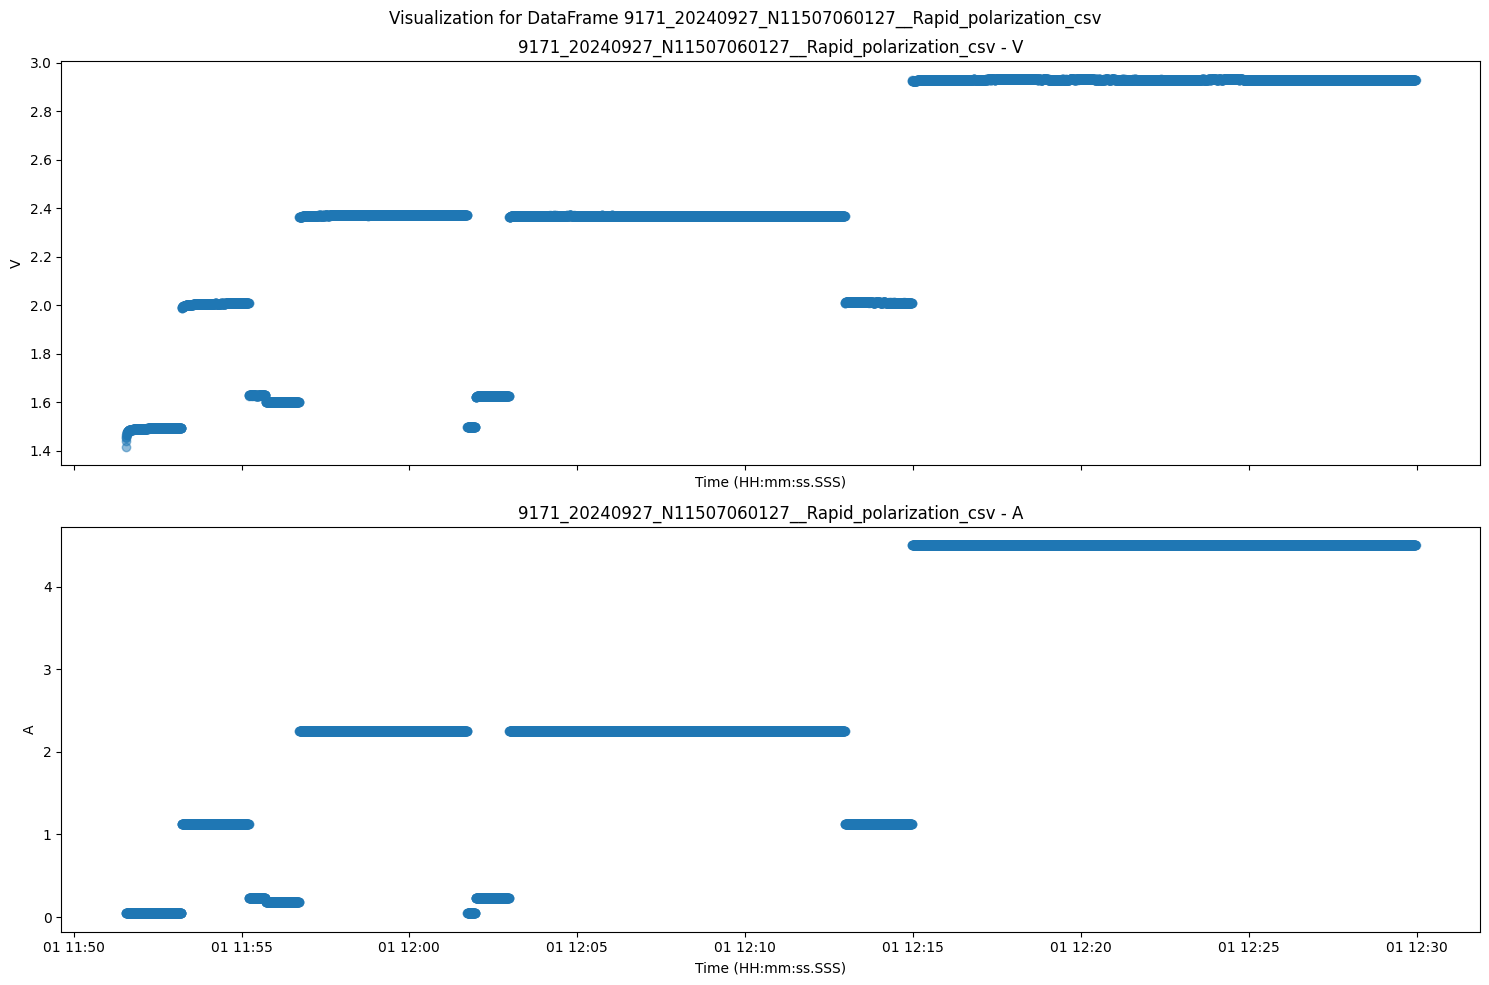

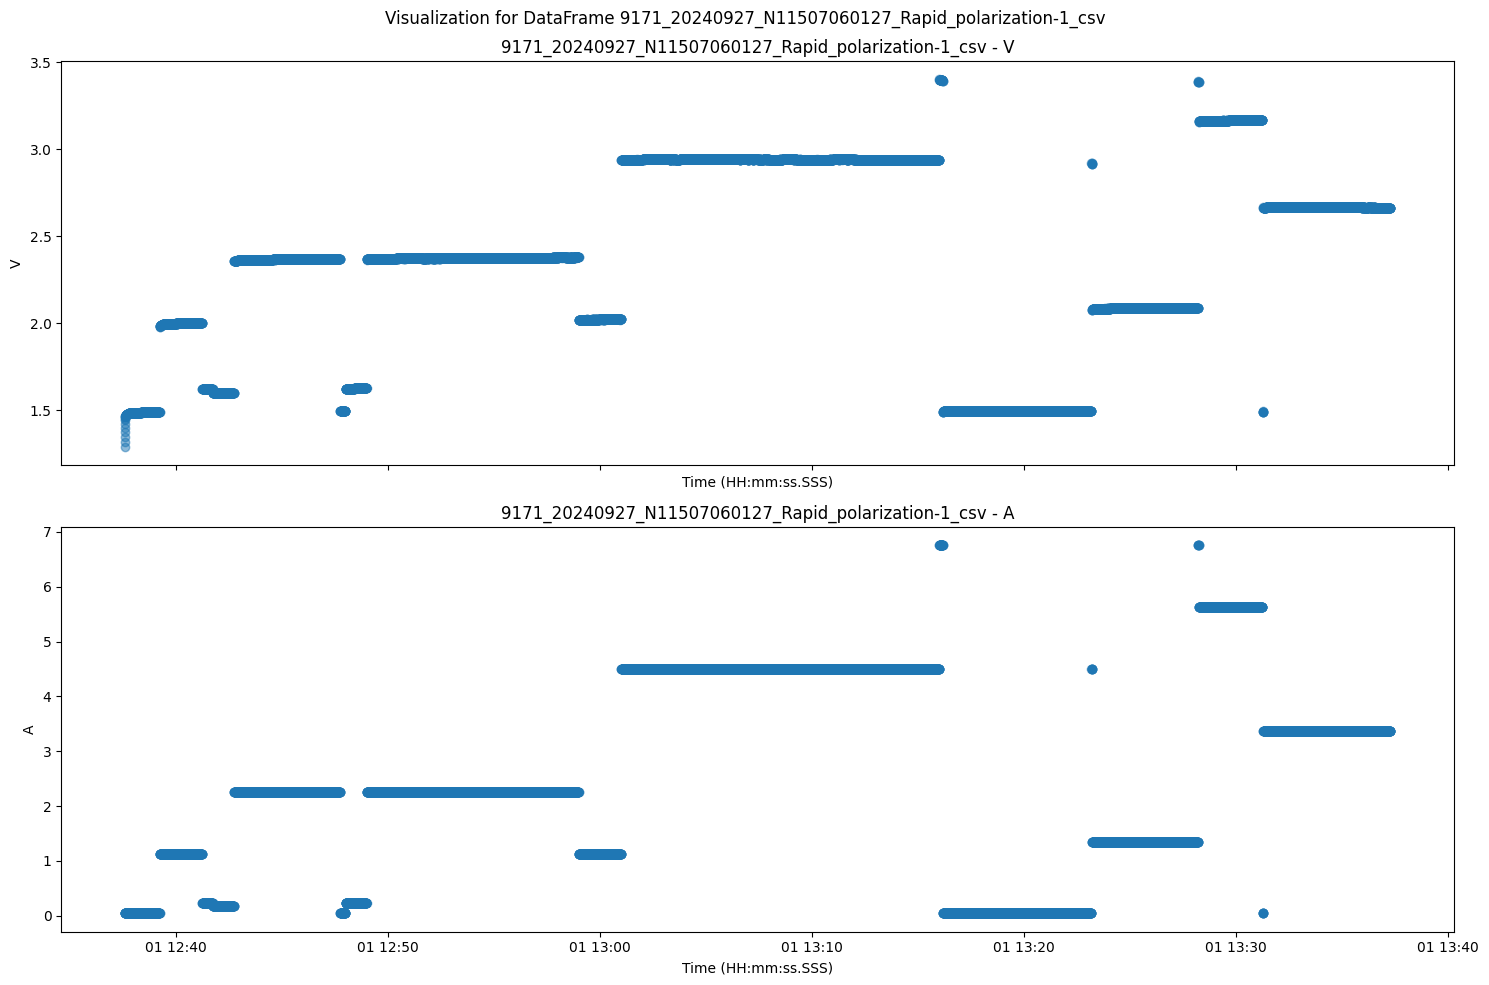

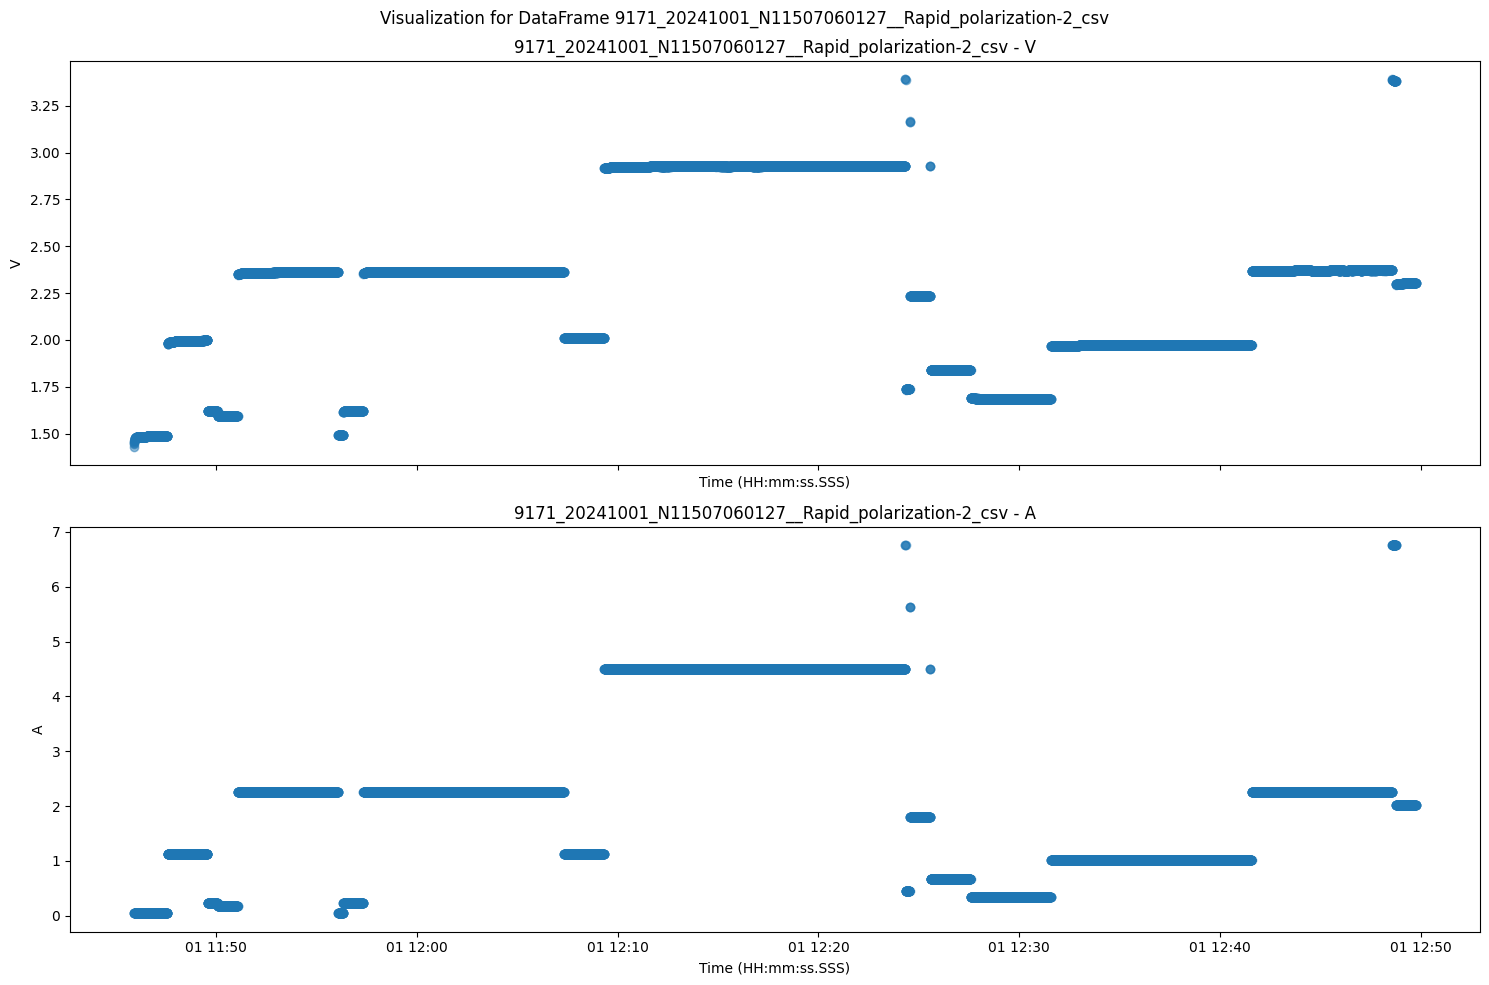

In [23]:
# Constants
TIME_COLUMN_NAME = 'Time (HH:mm:ss.SSS)'

# Create plots for each DataFrame
for key, df in dataframes.items():
    # Convert TIME_COLUMN_NAME to datetime with explicit format
    df[TIME_COLUMN_NAME] = pd.to_datetime(df[TIME_COLUMN_NAME], format='%H:%M:%S.%f', errors='coerce')
    
    # Ensure 'Channel', 'V', and 'A' are numeric
    df[['Channel', 'V', 'A']] = df[['Channel', 'V', 'A']].apply(pd.to_numeric, errors='coerce')
    
    # Plotting setup
    fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(15, 10), sharex=True)
    fig.suptitle(f"Visualization for DataFrame {key}")
    
    # Scatter plots using plot_scatterplot_on_ax
    ptt.plot_scatterplot_on_ax(axs[0], df[TIME_COLUMN_NAME], df['V'], x_label=TIME_COLUMN_NAME, y_label='V', title=f"{key} - V")
    ptt.plot_scatterplot_on_ax(axs[1], df[TIME_COLUMN_NAME], df['A'], x_label=TIME_COLUMN_NAME, y_label='A', title=f"{key} - A")
    
    # Adjust layout
    plt.tight_layout()
    plt.show()


In [24]:

# Assign specific dataframes as validation, test, and training
training_data = dataframes[list(dataframes.keys())[0]]  
# test_data = dataframes[list(dataframes.keys())[1]].iloc[9900:].reset_index(drop=True)
test_data = dataframes[list(dataframes.keys())[1]]      
validation_data = dataframes[list(dataframes.keys())[2]].iloc[9900:].reset_index(drop=True)   

print("Validation Data (df1):")
print(validation_data.shape)
print("\nTest Data (df2):")
print(test_data.shape)
print("\nTraining Data (df3):")
print(training_data.shape)

# Remove rows with any null values
validation_data = validation_data.dropna()
print("Rows with null values removed. New shape:", validation_data.shape)

test_data = test_data.dropna()
print("Rows with null values removed. New shape:", test_data.shape)

training_data = training_data.dropna()
print("Rows with null values removed. New shape:", training_data.shape)

Validation Data (df1):
(6483, 5)

Test Data (df2):
(15293, 5)

Training Data (df3):
(9831, 5)
Rows with null values removed. New shape: (6443, 5)
Rows with null values removed. New shape: (15225, 5)
Rows with null values removed. New shape: (9795, 5)


In [25]:
# training_data['V'] = training_data['V'] - training_data['V'][0]
# validation_data['V'] = validation_data['V'] - validation_data['V'][0]
# test_data['V'] = test_data['V'] - test_data['V'][0]

In [26]:
training_data.columns


Index(['Time (HH:mm:ss.SSS)', 'Channel', 'CH', 'V', 'A'], dtype='object')

In [27]:
# Extract input and output columns for each dataset
# For validation set
validation_x = validation_data['A'].values  # Input: Current (A)
validation_y = validation_data['V'].values  # Output: Voltage (V)

# For test set
test_x = test_data['A'].values  # Input: Current (A)
test_y = test_data['V'].values  # Output: Voltage (V)

# # For training set
# training_data['A'] = (training_data['A'] - training_data['A'].mean()) / training_data['A'].std()
# training_data['V'] = (training_data['V'] - training_data['V'].mean()) / training_data['V'].std()


train_x = training_data['A'].values  # Input: Current (A)
train_y = training_data['V'].values  # Output: Voltage (V)

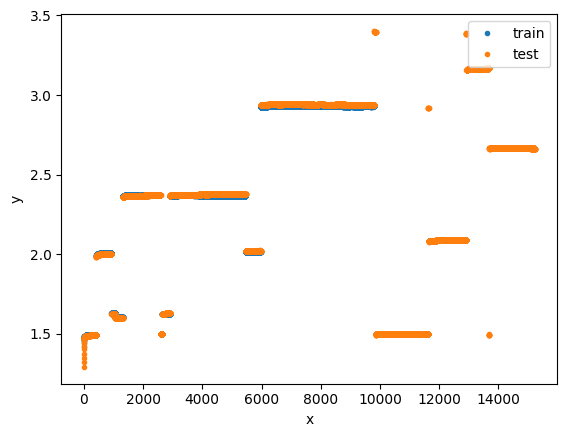

In [28]:
plt.plot(train_y, '.',label='train')  # Use extracted train_y
plt.plot(test_y, '.', label='test')    # Use extracted test_y
# plt.plot(validation_y, '.', label='validation')  # Use extracted validation_y
plt.ylabel('y')
plt.xlabel('x')
plt.legend()
plt.show()


## Applying the deepSI NN

In [29]:
import deepSI
import numpy as np
from matplotlib import pyplot as plt
import torch
from torch import optim, nn
from tqdm.auto import tqdm
# from deepSI import System_data, System_data_list

In [30]:
sys_data_train = deepSI.System_data(train_x, train_y)  # create a SystemData object
train = sys_data_train

sys_data_test = deepSI.System_data(test_x, test_y)  # create a SystemData object
test = sys_data_test

sys_data_val = deepSI.System_data(validation_x, validation_y)  # create a SystemData object
val = sys_data_val

In [31]:
class my_encoder_net(nn.Module): #a simple FC net with a residual (defaulth appraoch)
    def __init__(self, nb, nu, na, ny, nx, n_nodes_per_layer=64, n_hidden_layers=2, activation=nn.Tanh):
        super(my_encoder_net, self).__init__()
        from deepSI.utils import simple_res_net
        self.nu = tuple() if nu is None else ((nu,) if isinstance(nu,int) else nu)
        self.ny = tuple() if ny is None else ((ny,) if isinstance(ny,int) else ny)
        self.net = simple_res_net(n_in=nb*np.prod(self.nu,dtype=int) + na*np.prod(self.ny,dtype=int), \
            n_out=nx, n_nodes_per_layer=n_nodes_per_layer, n_hidden_layers=n_hidden_layers, activation=activation)

    def forward(self, upast, ypast):
        net_in = torch.cat([upast.view(upast.shape[0],-1),ypast.view(ypast.shape[0],-1)],axis=1)
        return self.net(net_in)

class my_lin_encoder_net(nn.Module): #linear encoder appraoch
    def __init__(self, nb, nu, na, ny, nx, b0=0.5):
        super(my_lin_encoder_net, self).__init__()
        self.b = nn.Parameter(data=torch.as_tensor(b0))

    def forward(self, upast, ypast):
        #first dimention is always the batch dimension (Nb)
        #upast shape: (Nb, nb)
        #ypast shape: (Nb, na)
        return (upast[:,-1] + self.b*ypast[:,-1])[:,None]

class my_state_net(nn.Module): #
    def __init__(self, nx, nu, a0=0.5):
        super(my_state_net, self).__init__()
        self.a = nn.Parameter(data=torch.as_tensor(a0))

    def forward(self, x, u):
        #first dimention is always the batch dimention
        # x shape: (Nb, 1)
        # u shape: (Nb)
        return x*self.a + u[:,None]

class my_output_net(nn.Module):
    def __init__(self, nx, ny):
        super(my_output_net, self).__init__()

    def forward(self, x, u=None):
        #first dimention is always the batch dimention
        return x[:,0] #(Nb,nx)

In [32]:
a_now = 0.5

In [33]:
fit_sys = deepSI.fit_systems.SS_encoder_general(nx=1, na=2, nb=2,\
                                                e_net=my_encoder_net, e_net_kwargs=dict(),\
                                                f_net=my_state_net, f_net_kwargs=dict(a0=a_now*0.9),\
                                                h_net=my_output_net)
fit_sys.init_model(nu=None,ny=None)
fit_sys.fit(train, val, epochs=100, loss_kwargs=dict(nf=25), auto_fit_norm=False, optimizer_kwargs=dict(betas=(0.99,0.999))) #nf = T in the paper

Model already initilized (init_model_done=True), skipping initilizing of the model, the norm and the creation of the optimizer
Size of the training array =  2.0 MB
N_training_samples = 9769, batch_size = 256, N_batch_updates_per_epoch = 38
Initial Validation sim-NRMS= 4.8821437729785595


  2%|▏         | 75/3800 [00:00<00:40, 92.05it/s]

########## New lowest validation loss achieved ########### sim-NRMS = 4.402645329040595
It   38, sqrt loss   3.137, Val sim-NRMS  4.403, Time Loss: 46.4%, data: 10.9%, val: 42.7%, 47.9 batches/sec


  3%|▎         | 99/3800 [00:01<01:04, 57.49it/s]

########## New lowest validation loss achieved ########### sim-NRMS = 4.059403588626075
It   76, sqrt loss   2.846, Val sim-NRMS  4.059, Time Loss: 38.6%, data: 7.8%, val: 53.6%, 53.4 batches/sec


  3%|▎         | 129/3800 [00:02<01:08, 53.95it/s]

########## New lowest validation loss achieved ########### sim-NRMS = 3.814026638010544
It  114, sqrt loss   2.615, Val sim-NRMS  3.814, Time Loss: 39.2%, data: 5.1%, val: 55.6%, 52.1 batches/sec


  5%|▍         | 172/3800 [00:02<00:58, 62.44it/s]

########## New lowest validation loss achieved ########### sim-NRMS = 3.635411191460391
It  152, sqrt loss   2.422, Val sim-NRMS  3.635, Time Loss: 38.8%, data: 4.9%, val: 56.3%, 53.5 batches/sec


  6%|▌         | 220/3800 [00:03<00:50, 70.36it/s]

########## New lowest validation loss achieved ########### sim-NRMS = 3.5081060479399264
It  190, sqrt loss    2.26, Val sim-NRMS  3.508, Time Loss: 37.9%, data: 4.9%, val: 57.1%, 54.9 batches/sec


  6%|▋         | 245/3800 [00:04<00:58, 60.76it/s]

########## New lowest validation loss achieved ########### sim-NRMS = 3.416902180067561
It  228, sqrt loss   2.124, Val sim-NRMS  3.417, Time Loss: 37.6%, data: 4.2%, val: 58.1%, 56.0 batches/sec


  8%|▊         | 293/3800 [00:04<00:52, 66.85it/s]

########## New lowest validation loss achieved ########### sim-NRMS = 3.352657533676729
It  266, sqrt loss   2.004, Val sim-NRMS  3.353, Time Loss: 37.1%, data: 4.1%, val: 58.9%, 55.7 batches/sec


  9%|▊         | 325/3800 [00:05<00:50, 69.44it/s]

########## New lowest validation loss achieved ########### sim-NRMS = 3.3095603271838447
It  304, sqrt loss   1.899, Val sim-NRMS   3.31, Time Loss: 36.7%, data: 3.8%, val: 59.5%, 57.0 batches/sec


  9%|▉         | 358/3800 [00:05<00:49, 68.95it/s]

########## New lowest validation loss achieved ########### sim-NRMS = 3.28151442074199
It  342, sqrt loss   1.808, Val sim-NRMS  3.282, Time Loss: 36.2%, data: 3.9%, val: 59.9%, 58.3 batches/sec


 11%|█         | 412/3800 [00:06<00:48, 69.82it/s]

########## New lowest validation loss achieved ########### sim-NRMS = 3.2654594453820343
It  380, sqrt loss   1.725, Val sim-NRMS  3.265, Time Loss: 35.6%, data: 3.6%, val: 60.8%, 57.7 batches/sec


 11%|█▏        | 435/3800 [00:07<00:55, 60.39it/s]

########## New lowest validation loss achieved ########### sim-NRMS = 3.258444371444116
It  418, sqrt loss   1.653, Val sim-NRMS  3.258, Time Loss: 36.0%, data: 3.3%, val: 60.7%, 58.5 batches/sec


 13%|█▎        | 481/3800 [00:07<00:41, 80.50it/s]

########## New lowest validation loss achieved ########### sim-NRMS = 3.258425749139608
It  456, sqrt loss   1.587, Val sim-NRMS  3.258, Time Loss: 36.8%, data: 3.5%, val: 59.7%, 59.6 batches/sec


 13%|█▎        | 507/3800 [00:08<00:54, 60.27it/s]

It  494, sqrt loss   1.526, Val sim-NRMS  3.264, Time Loss: 36.3%, data: 3.2%, val: 60.5%, 59.5 batches/sec


 15%|█▍        | 560/3800 [00:09<00:45, 70.88it/s]

It  532, sqrt loss   1.473, Val sim-NRMS  3.273, Time Loss: 36.4%, data: 3.1%, val: 60.6%, 59.7 batches/sec


 15%|█▌        | 587/3800 [00:09<00:51, 61.93it/s]

It  570, sqrt loss   1.423, Val sim-NRMS  3.286, Time Loss: 36.2%, data: 3.1%, val: 60.7%, 59.6 batches/sec


 16%|█▋        | 618/3800 [00:10<00:53, 59.95it/s]

It  608, sqrt loss   1.377, Val sim-NRMS  3.301, Time Loss: 36.6%, data: 3.0%, val: 60.4%, 60.3 batches/sec


 18%|█▊        | 677/3800 [00:10<00:40, 77.72it/s]

It  646, sqrt loss   1.336, Val sim-NRMS  3.317, Time Loss: 37.4%, data: 2.9%, val: 59.6%, 60.1 batches/sec


 19%|█▊        | 708/3800 [00:11<00:43, 71.17it/s]

It  684, sqrt loss   1.297, Val sim-NRMS  3.335, Time Loss: 37.3%, data: 2.8%, val: 59.9%, 60.5 batches/sec


 20%|█▉        | 752/3800 [00:12<00:41, 73.98it/s]

It  722, sqrt loss   1.263, Val sim-NRMS  3.354, Time Loss: 36.7%, data: 2.8%, val: 60.5%, 60.3 batches/sec


 20%|██        | 776/3800 [00:12<00:52, 57.25it/s]

It  760, sqrt loss    1.23, Val sim-NRMS  3.374, Time Loss: 36.7%, data: 2.7%, val: 60.5%, 60.1 batches/sec


 22%|██▏       | 822/3800 [00:13<00:46, 63.96it/s]

It  798, sqrt loss   1.199, Val sim-NRMS  3.393, Time Loss: 36.6%, data: 2.8%, val: 60.5%, 59.7 batches/sec


 22%|██▏       | 852/3800 [00:14<00:47, 62.62it/s]

It  836, sqrt loss   1.172, Val sim-NRMS  3.414, Time Loss: 36.6%, data: 2.7%, val: 60.7%, 60.0 batches/sec


 23%|██▎       | 890/3800 [00:14<00:47, 61.85it/s]

It  874, sqrt loss   1.146, Val sim-NRMS  3.434, Time Loss: 36.9%, data: 3.0%, val: 60.1%, 59.7 batches/sec


 25%|██▍       | 934/3800 [00:15<00:37, 77.40it/s]

It  912, sqrt loss   1.122, Val sim-NRMS  3.454, Time Loss: 36.9%, data: 2.9%, val: 60.2%, 60.1 batches/sec


 26%|██▌       | 971/3800 [00:15<00:32, 85.89it/s]

It  950, sqrt loss   1.099, Val sim-NRMS  3.474, Time Loss: 37.1%, data: 2.8%, val: 60.1%, 60.9 batches/sec


 26%|██▋       | 1005/3800 [00:16<00:34, 81.39it/s]

It  988, sqrt loss   1.079, Val sim-NRMS  3.494, Time Loss: 37.0%, data: 2.8%, val: 60.2%, 61.4 batches/sec


 28%|██▊       | 1057/3800 [00:16<00:32, 84.49it/s] 

It 1026, sqrt loss    1.06, Val sim-NRMS  3.514, Time Loss: 37.0%, data: 2.9%, val: 60.1%, 61.8 batches/sec


 29%|██▉       | 1093/3800 [00:17<00:29, 91.61it/s]

It 1064, sqrt loss   1.041, Val sim-NRMS  3.534, Time Loss: 37.2%, data: 3.0%, val: 59.8%, 62.3 batches/sec


 30%|██▉       | 1125/3800 [00:17<00:31, 84.45it/s]

It 1102, sqrt loss   1.025, Val sim-NRMS  3.553, Time Loss: 37.1%, data: 3.0%, val: 59.8%, 62.8 batches/sec


 30%|███       | 1154/3800 [00:18<00:33, 78.58it/s]

It 1140, sqrt loss   1.009, Val sim-NRMS  3.572, Time Loss: 37.3%, data: 3.0%, val: 59.6%, 63.3 batches/sec


 32%|███▏      | 1200/3800 [00:18<00:30, 84.68it/s]

It 1178, sqrt loss  0.9946, Val sim-NRMS   3.59, Time Loss: 37.7%, data: 3.0%, val: 59.3%, 63.5 batches/sec


 32%|███▏      | 1233/3800 [00:19<00:29, 88.28it/s]

It 1216, sqrt loss   0.981, Val sim-NRMS  3.608, Time Loss: 37.7%, data: 3.2%, val: 59.1%, 64.1 batches/sec


 34%|███▍      | 1283/3800 [00:19<00:26, 95.07it/s] 

It 1254, sqrt loss  0.9687, Val sim-NRMS  3.626, Time Loss: 37.8%, data: 3.3%, val: 58.9%, 64.6 batches/sec


 35%|███▍      | 1317/3800 [00:20<00:27, 88.70it/s]

It 1292, sqrt loss  0.9561, Val sim-NRMS  3.643, Time Loss: 37.9%, data: 3.4%, val: 58.8%, 64.9 batches/sec


 35%|███▌      | 1347/3800 [00:20<00:27, 87.96it/s]

It 1330, sqrt loss  0.9453, Val sim-NRMS   3.66, Time Loss: 38.1%, data: 3.4%, val: 58.6%, 65.4 batches/sec


 37%|███▋      | 1399/3800 [00:21<00:26, 89.51it/s] 

It 1368, sqrt loss  0.9346, Val sim-NRMS  3.677, Time Loss: 38.0%, data: 3.5%, val: 58.5%, 65.6 batches/sec


 38%|███▊      | 1430/3800 [00:21<00:27, 87.66it/s]

It 1406, sqrt loss  0.9251, Val sim-NRMS  3.693, Time Loss: 38.2%, data: 3.4%, val: 58.4%, 66.1 batches/sec


 38%|███▊      | 1461/3800 [00:21<00:29, 77.97it/s]

It 1444, sqrt loss  0.9157, Val sim-NRMS  3.709, Time Loss: 38.3%, data: 3.4%, val: 58.4%, 66.2 batches/sec


 40%|███▉      | 1508/3800 [00:22<00:27, 82.32it/s]

It 1482, sqrt loss  0.9071, Val sim-NRMS  3.724, Time Loss: 38.3%, data: 3.4%, val: 58.3%, 66.4 batches/sec


 40%|████      | 1536/3800 [00:22<00:29, 75.47it/s]

It 1520, sqrt loss  0.8995, Val sim-NRMS  3.739, Time Loss: 38.4%, data: 3.4%, val: 58.2%, 66.6 batches/sec


 42%|████▏     | 1588/3800 [00:23<00:24, 88.62it/s]

It 1558, sqrt loss  0.8917, Val sim-NRMS  3.754, Time Loss: 38.5%, data: 3.4%, val: 58.1%, 66.7 batches/sec


 43%|████▎     | 1619/3800 [00:23<00:27, 79.00it/s]

It 1596, sqrt loss  0.8857, Val sim-NRMS  3.768, Time Loss: 38.3%, data: 3.5%, val: 58.2%, 66.9 batches/sec


 44%|████▎     | 1655/3800 [00:24<00:24, 86.75it/s]

It 1634, sqrt loss  0.8783, Val sim-NRMS  3.782, Time Loss: 38.3%, data: 3.6%, val: 58.1%, 67.2 batches/sec


 45%|████▍     | 1700/3800 [00:24<00:23, 88.29it/s]

It 1672, sqrt loss   0.873, Val sim-NRMS  3.795, Time Loss: 38.4%, data: 3.6%, val: 57.9%, 67.5 batches/sec


 46%|████▌     | 1729/3800 [00:25<00:25, 81.31it/s]

It 1710, sqrt loss  0.8666, Val sim-NRMS  3.809, Time Loss: 38.5%, data: 3.7%, val: 57.8%, 67.7 batches/sec


 47%|████▋     | 1772/3800 [00:25<00:24, 84.25it/s]

It 1748, sqrt loss   0.862, Val sim-NRMS  3.821, Time Loss: 38.6%, data: 3.7%, val: 57.7%, 67.9 batches/sec


 48%|████▊     | 1808/3800 [00:26<00:22, 87.03it/s]

It 1786, sqrt loss  0.8568, Val sim-NRMS  3.834, Time Loss: 38.7%, data: 3.6%, val: 57.6%, 68.1 batches/sec


 48%|████▊     | 1840/3800 [00:26<00:21, 91.87it/s]

It 1824, sqrt loss  0.8525, Val sim-NRMS  3.846, Time Loss: 38.8%, data: 3.6%, val: 57.5%, 68.6 batches/sec


 50%|████▉     | 1891/3800 [00:27<00:20, 94.92it/s] 

It 1862, sqrt loss  0.8477, Val sim-NRMS  3.858, Time Loss: 38.8%, data: 3.7%, val: 57.4%, 68.8 batches/sec


 51%|█████     | 1928/3800 [00:27<00:19, 98.34it/s]

It 1900, sqrt loss  0.8442, Val sim-NRMS   3.87, Time Loss: 38.9%, data: 3.8%, val: 57.3%, 69.0 batches/sec


 52%|█████▏    | 1965/3800 [00:28<00:18, 99.68it/s]

It 1938, sqrt loss  0.8402, Val sim-NRMS  3.881, Time Loss: 38.9%, data: 3.8%, val: 57.3%, 69.4 batches/sec


 53%|█████▎    | 1997/3800 [00:28<00:19, 90.57it/s]

It 1976, sqrt loss  0.8368, Val sim-NRMS  3.892, Time Loss: 38.9%, data: 3.7%, val: 57.3%, 69.6 batches/sec


 53%|█████▎    | 2030/3800 [00:28<00:20, 84.69it/s]

It 2014, sqrt loss  0.8337, Val sim-NRMS  3.902, Time Loss: 38.9%, data: 3.7%, val: 57.3%, 69.8 batches/sec


 55%|█████▍    | 2083/3800 [00:29<00:18, 92.73it/s] 

It 2052, sqrt loss  0.8306, Val sim-NRMS  3.913, Time Loss: 38.9%, data: 3.8%, val: 57.2%, 70.0 batches/sec


 56%|█████▌    | 2110/3800 [00:29<00:19, 84.51it/s]

It 2090, sqrt loss  0.8276, Val sim-NRMS  3.923, Time Loss: 39.0%, data: 3.8%, val: 57.1%, 70.2 batches/sec


 57%|█████▋    | 2163/3800 [00:30<00:15, 103.81it/s]

It 2128, sqrt loss  0.8251, Val sim-NRMS  3.933, Time Loss: 39.2%, data: 3.8%, val: 56.9%, 70.4 batches/sec


 58%|█████▊    | 2192/3800 [00:30<00:18, 84.93it/s] 

It 2166, sqrt loss  0.8226, Val sim-NRMS  3.942, Time Loss: 39.2%, data: 3.8%, val: 57.0%, 70.6 batches/sec


 58%|█████▊    | 2220/3800 [00:31<00:19, 81.35it/s]

It 2204, sqrt loss  0.8206, Val sim-NRMS  3.951, Time Loss: 39.2%, data: 3.9%, val: 56.8%, 70.8 batches/sec


 60%|█████▉    | 2274/3800 [00:31<00:15, 96.21it/s]

It 2242, sqrt loss  0.8186, Val sim-NRMS   3.96, Time Loss: 39.2%, data: 4.0%, val: 56.7%, 70.9 batches/sec


 61%|██████    | 2306/3800 [00:32<00:17, 83.75it/s]

It 2280, sqrt loss  0.8163, Val sim-NRMS  3.969, Time Loss: 39.1%, data: 4.0%, val: 56.8%, 71.0 batches/sec


 61%|██████▏   | 2335/3800 [00:32<00:17, 83.82it/s]

It 2318, sqrt loss  0.8144, Val sim-NRMS  3.977, Time Loss: 39.1%, data: 4.0%, val: 56.8%, 71.2 batches/sec


 63%|██████▎   | 2378/3800 [00:33<00:15, 92.08it/s]

It 2356, sqrt loss  0.8127, Val sim-NRMS  3.985, Time Loss: 39.2%, data: 4.0%, val: 56.7%, 71.3 batches/sec


 64%|██████▍   | 2428/3800 [00:33<00:12, 106.17it/s]

It 2394, sqrt loss  0.8112, Val sim-NRMS  3.993, Time Loss: 39.2%, data: 4.0%, val: 56.7%, 71.6 batches/sec


 65%|██████▍   | 2461/3800 [00:34<00:15, 86.77it/s] 

It 2432, sqrt loss  0.8099, Val sim-NRMS  4.001, Time Loss: 39.2%, data: 4.0%, val: 56.7%, 71.6 batches/sec


 66%|██████▌   | 2492/3800 [00:34<00:15, 85.93it/s]

It 2470, sqrt loss  0.8089, Val sim-NRMS  4.008, Time Loss: 39.3%, data: 4.0%, val: 56.6%, 71.7 batches/sec


 67%|██████▋   | 2528/3800 [00:35<00:14, 87.30it/s]

It 2508, sqrt loss  0.8072, Val sim-NRMS  4.016, Time Loss: 39.4%, data: 3.9%, val: 56.6%, 71.8 batches/sec


 68%|██████▊   | 2578/3800 [00:35<00:13, 90.89it/s] 

It 2546, sqrt loss  0.8064, Val sim-NRMS  4.023, Time Loss: 39.4%, data: 4.0%, val: 56.6%, 71.9 batches/sec


 69%|██████▊   | 2608/3800 [00:35<00:13, 86.00it/s]

It 2584, sqrt loss  0.8052, Val sim-NRMS   4.03, Time Loss: 39.4%, data: 4.1%, val: 56.5%, 72.1 batches/sec


 69%|██████▉   | 2639/3800 [00:36<00:14, 81.33it/s]

It 2622, sqrt loss  0.8039, Val sim-NRMS  4.036, Time Loss: 39.3%, data: 4.1%, val: 56.5%, 72.2 batches/sec


 71%|███████   | 2697/3800 [00:37<00:11, 97.81it/s]

It 2660, sqrt loss  0.8035, Val sim-NRMS  4.043, Time Loss: 39.3%, data: 4.1%, val: 56.5%, 72.2 batches/sec


 71%|███████▏  | 2712/3800 [00:37<00:14, 77.61it/s]

It 2698, sqrt loss  0.8028, Val sim-NRMS  4.049, Time Loss: 39.3%, data: 4.1%, val: 56.5%, 72.4 batches/sec


 73%|███████▎  | 2757/3800 [00:37<00:10, 95.99it/s]

It 2736, sqrt loss  0.8016, Val sim-NRMS  4.055, Time Loss: 39.3%, data: 4.1%, val: 56.5%, 72.7 batches/sec


 74%|███████▎  | 2801/3800 [00:38<00:10, 99.05it/s]

It 2774, sqrt loss  0.8006, Val sim-NRMS   4.06, Time Loss: 39.3%, data: 4.0%, val: 56.5%, 72.8 batches/sec


 75%|███████▍  | 2832/3800 [00:38<00:10, 91.83it/s]

It 2812, sqrt loss     0.8, Val sim-NRMS  4.066, Time Loss: 39.3%, data: 4.0%, val: 56.6%, 73.0 batches/sec


 76%|███████▌  | 2880/3800 [00:39<00:09, 94.67it/s] 

It 2850, sqrt loss     0.8, Val sim-NRMS  4.071, Time Loss: 39.4%, data: 4.1%, val: 56.5%, 73.1 batches/sec


 77%|███████▋  | 2913/3800 [00:39<00:09, 93.75it/s]

It 2888, sqrt loss   0.799, Val sim-NRMS  4.077, Time Loss: 39.4%, data: 4.1%, val: 56.4%, 73.3 batches/sec


 77%|███████▋  | 2944/3800 [00:39<00:09, 90.81it/s]

It 2926, sqrt loss   0.799, Val sim-NRMS  4.081, Time Loss: 39.5%, data: 4.1%, val: 56.4%, 73.4 batches/sec


 78%|███████▊  | 2978/3800 [00:40<00:09, 84.94it/s] 

It 2964, sqrt loss  0.7981, Val sim-NRMS  4.086, Time Loss: 39.5%, data: 4.1%, val: 56.3%, 73.6 batches/sec


 79%|███████▉  | 3019/3800 [00:40<00:08, 92.90it/s]

It 3002, sqrt loss  0.7979, Val sim-NRMS  4.091, Time Loss: 39.5%, data: 4.1%, val: 56.4%, 73.8 batches/sec


 81%|████████  | 3068/3800 [00:41<00:07, 92.99it/s] 

It 3040, sqrt loss  0.7974, Val sim-NRMS  4.095, Time Loss: 39.5%, data: 4.1%, val: 56.3%, 73.8 batches/sec


 82%|████████▏ | 3098/3800 [00:41<00:07, 88.75it/s]

It 3078, sqrt loss  0.7966, Val sim-NRMS    4.1, Time Loss: 39.4%, data: 4.2%, val: 56.4%, 74.0 batches/sec


 82%|████████▏ | 3130/3800 [00:42<00:14, 47.62it/s]

It 3116, sqrt loss  0.7969, Val sim-NRMS  4.104, Time Loss: 38.8%, data: 4.1%, val: 57.0%, 72.9 batches/sec


 84%|████████▎ | 3179/3800 [00:43<00:09, 66.52it/s]

It 3154, sqrt loss  0.7969, Val sim-NRMS  4.108, Time Loss: 38.8%, data: 4.1%, val: 57.0%, 72.8 batches/sec


 84%|████████▍ | 3207/3800 [00:43<00:09, 64.16it/s]

It 3192, sqrt loss  0.7961, Val sim-NRMS  4.112, Time Loss: 38.7%, data: 4.1%, val: 57.1%, 72.8 batches/sec


 86%|████████▌ | 3255/3800 [00:44<00:07, 72.34it/s]

It 3230, sqrt loss  0.7959, Val sim-NRMS  4.116, Time Loss: 38.7%, data: 4.1%, val: 57.1%, 72.6 batches/sec


 86%|████████▋ | 3283/3800 [00:45<00:08, 59.10it/s]

It 3268, sqrt loss  0.7957, Val sim-NRMS  4.119, Time Loss: 38.6%, data: 4.0%, val: 57.3%, 72.4 batches/sec


 88%|████████▊ | 3335/3800 [00:45<00:06, 68.58it/s]

It 3306, sqrt loss  0.7954, Val sim-NRMS  4.122, Time Loss: 38.6%, data: 4.0%, val: 57.4%, 72.1 batches/sec


 88%|████████▊ | 3363/3800 [00:46<00:07, 61.21it/s]

It 3344, sqrt loss  0.7953, Val sim-NRMS  4.125, Time Loss: 38.5%, data: 4.0%, val: 57.5%, 72.0 batches/sec


 89%|████████▉ | 3392/3800 [00:47<00:08, 46.13it/s]

It 3382, sqrt loss  0.7953, Val sim-NRMS  4.129, Time Loss: 38.4%, data: 3.9%, val: 57.6%, 71.7 batches/sec


 90%|█████████ | 3432/3800 [00:48<00:07, 46.69it/s]

It 3420, sqrt loss  0.7954, Val sim-NRMS  4.132, Time Loss: 38.2%, data: 3.9%, val: 57.8%, 71.2 batches/sec


 92%|█████████▏| 3479/3800 [00:48<00:05, 59.22it/s]

It 3458, sqrt loss  0.7952, Val sim-NRMS  4.134, Time Loss: 38.3%, data: 3.9%, val: 57.7%, 70.9 batches/sec


 92%|█████████▏| 3511/3800 [00:49<00:04, 64.05it/s]

It 3496, sqrt loss  0.7949, Val sim-NRMS  4.137, Time Loss: 38.3%, data: 3.9%, val: 57.7%, 70.9 batches/sec


 94%|█████████▎| 3555/3800 [00:50<00:03, 67.11it/s]

It 3534, sqrt loss  0.7947, Val sim-NRMS   4.14, Time Loss: 38.4%, data: 3.9%, val: 57.6%, 70.7 batches/sec


 95%|█████████▍| 3601/3800 [00:50<00:02, 74.45it/s]

It 3572, sqrt loss  0.7944, Val sim-NRMS  4.142, Time Loss: 38.4%, data: 3.9%, val: 57.6%, 70.7 batches/sec


 95%|█████████▌| 3622/3800 [00:51<00:03, 57.92it/s]

It 3610, sqrt loss  0.7944, Val sim-NRMS  4.145, Time Loss: 38.4%, data: 3.9%, val: 57.7%, 70.7 batches/sec


 97%|█████████▋| 3675/3800 [00:51<00:01, 74.32it/s]

It 3648, sqrt loss  0.7941, Val sim-NRMS  4.147, Time Loss: 38.4%, data: 3.9%, val: 57.7%, 70.5 batches/sec


 98%|█████████▊| 3709/3800 [00:52<00:01, 82.23it/s]

It 3686, sqrt loss  0.7944, Val sim-NRMS  4.149, Time Loss: 38.4%, data: 3.9%, val: 57.7%, 70.6 batches/sec


 98%|█████████▊| 3736/3800 [00:52<00:00, 74.52it/s]

It 3724, sqrt loss  0.7941, Val sim-NRMS  4.151, Time Loss: 38.4%, data: 3.9%, val: 57.6%, 70.7 batches/sec


 99%|█████████▉| 3776/3800 [00:53<00:00, 77.74it/s] 

It 3762, sqrt loss  0.7943, Val sim-NRMS  4.153, Time Loss: 38.5%, data: 3.8%, val: 57.6%, 70.8 batches/sec


100%|██████████| 3800/3800 [00:53<00:00, 70.92it/s]

It 3800, sqrt loss  0.7944, Val sim-NRMS  4.155, Time Loss: 38.5%, data: 3.9%, val: 57.5%, 70.9 batches/sec
Loaded model with best known validation sim-NRMS of  3.258 which happened on epoch 456 (epoch_id=12.00)



c:\Users\onyer\OneDrive\Desktop\Research work\1. Projects\Battery_Analysis1\env_analysis\Lib\site-packages\deepSI\fit_systems\fit_system.py:501: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this exper

a fitted: 0.15567709505558014  real a: 0.5


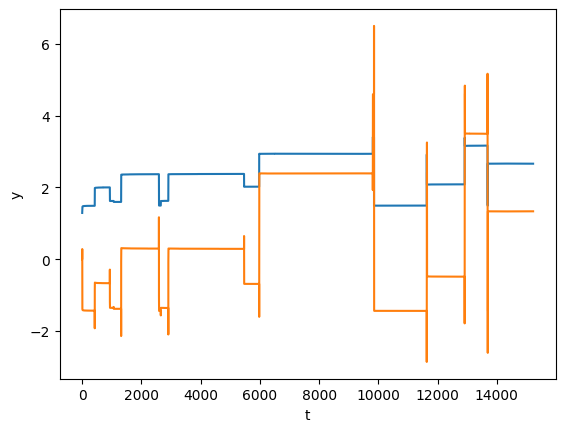

NRMS: 3.143082933529701


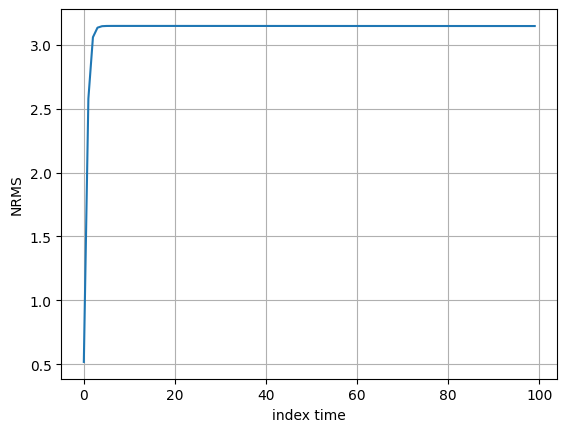

In [34]:
print('a fitted:', fit_sys.fn.a.item(), ' real a:',a_now)
test_p = fit_sys.apply_experiment(test)
test.plot()
(test_p-test).plot()
plt.show()
print('NRMS:',test_p.NRMS(test)) #1.0e-7
fit_sys.n_step_error_plot(test) #encoder isn't perfect but it works

Initilizing the model and optimizer
Size of the training array =  8.9 MB
N_training_samples = 9736, batch_size = 256, N_batch_updates_per_epoch = 38
Initial Validation sim-NRMS= 1.5642786641118778


  2%|▏         | 39/1900 [00:06<12:23,  2.50it/s]

########## New lowest validation loss achieved ########### sim-NRMS = 0.34278562724423584
It   38, sqrt loss  0.5147, Val sim-NRMS 0.3428, Time Loss: 80.4%, data: 1.6%, val: 18.0%,  5.7 batches/sec


  4%|▍         | 77/1900 [00:13<11:45,  2.58it/s]

########## New lowest validation loss achieved ########### sim-NRMS = 0.3068913766397836
It   76, sqrt loss  0.1946, Val sim-NRMS 0.3069, Time Loss: 80.2%, data: 1.4%, val: 18.4%,  5.7 batches/sec


  6%|▌         | 115/1900 [00:17<05:04,  5.85it/s]

########## New lowest validation loss achieved ########### sim-NRMS = 0.1722541141721001
It  114, sqrt loss  0.1419, Val sim-NRMS 0.1723, Time Loss: 81.1%, data: 1.2%, val: 17.6%,  6.7 batches/sec


  8%|▊         | 153/1900 [00:21<04:54,  5.94it/s]

########## New lowest validation loss achieved ########### sim-NRMS = 0.09088499147963061
It  152, sqrt loss 0.08407, Val sim-NRMS 0.09088, Time Loss: 81.6%, data: 1.1%, val: 17.3%,  7.3 batches/sec


 10%|█         | 191/1900 [00:24<05:20,  5.34it/s]

########## New lowest validation loss achieved ########### sim-NRMS = 0.08266054626194132
It  190, sqrt loss 0.05603, Val sim-NRMS 0.08266, Time Loss: 81.6%, data: 1.1%, val: 17.3%,  7.6 batches/sec


 12%|█▏        | 229/1900 [00:29<05:45,  4.84it/s]

It  228, sqrt loss 0.04944, Val sim-NRMS 0.08407, Time Loss: 81.8%, data: 1.0%, val: 17.3%,  7.9 batches/sec


 14%|█▍        | 267/1900 [00:32<04:50,  5.62it/s]

########## New lowest validation loss achieved ########### sim-NRMS = 0.07906343882179431
It  266, sqrt loss  0.0481, Val sim-NRMS 0.07906, Time Loss: 81.9%, data: 0.9%, val: 17.2%,  8.2 batches/sec


 16%|█▌        | 306/1900 [00:36<03:58,  6.69it/s]

########## New lowest validation loss achieved ########### sim-NRMS = 0.07752686992290132
It  304, sqrt loss 0.04801, Val sim-NRMS 0.07753, Time Loss: 81.8%, data: 0.9%, val: 17.3%,  8.4 batches/sec


 18%|█▊        | 342/1900 [00:39<03:59,  6.52it/s]

########## New lowest validation loss achieved ########### sim-NRMS = 0.0752066196740354
It  342, sqrt loss 0.04673, Val sim-NRMS 0.07521, Time Loss: 81.8%, data: 0.9%, val: 17.3%,  8.6 batches/sec


 20%|██        | 381/1900 [00:43<04:16,  5.91it/s]

It  380, sqrt loss 0.04582, Val sim-NRMS 0.08092, Time Loss: 81.9%, data: 0.9%, val: 17.2%,  8.8 batches/sec


 22%|██▏       | 419/1900 [00:46<04:14,  5.81it/s]

It  418, sqrt loss 0.04603, Val sim-NRMS 0.07703, Time Loss: 81.8%, data: 1.0%, val: 17.1%,  9.0 batches/sec


 24%|██▍       | 457/1900 [00:50<04:05,  5.89it/s]

########## New lowest validation loss achieved ########### sim-NRMS = 0.07339366671606185
It  456, sqrt loss 0.04536, Val sim-NRMS 0.07339, Time Loss: 82.0%, data: 0.9%, val: 17.1%,  9.1 batches/sec


 26%|██▌       | 495/1900 [00:53<04:03,  5.76it/s]

It  494, sqrt loss  0.0449, Val sim-NRMS 0.07766, Time Loss: 81.9%, data: 0.9%, val: 17.1%,  9.2 batches/sec


 28%|██▊       | 533/1900 [00:57<03:41,  6.18it/s]

########## New lowest validation loss achieved ########### sim-NRMS = 0.0731543375719927
It  532, sqrt loss 0.04438, Val sim-NRMS 0.07315, Time Loss: 81.9%, data: 1.0%, val: 17.1%,  9.3 batches/sec


 30%|███       | 571/1900 [01:00<03:37,  6.10it/s]

########## New lowest validation loss achieved ########### sim-NRMS = 0.07128810562237925
It  570, sqrt loss 0.04491, Val sim-NRMS 0.07129, Time Loss: 81.9%, data: 1.0%, val: 17.1%,  9.5 batches/sec


 32%|███▏      | 609/1900 [01:04<03:22,  6.37it/s]

It  608, sqrt loss 0.04453, Val sim-NRMS 0.07386, Time Loss: 82.0%, data: 1.0%, val: 17.0%,  9.5 batches/sec


 34%|███▍      | 647/1900 [01:07<03:18,  6.32it/s]

It  646, sqrt loss 0.04573, Val sim-NRMS 0.07146, Time Loss: 82.1%, data: 1.0%, val: 17.0%,  9.6 batches/sec


 36%|███▌      | 685/1900 [01:11<03:16,  6.18it/s]

It  684, sqrt loss 0.04378, Val sim-NRMS 0.07163, Time Loss: 82.1%, data: 1.0%, val: 16.9%,  9.6 batches/sec


 38%|███▊      | 723/1900 [01:14<03:11,  6.15it/s]

It  722, sqrt loss 0.04371, Val sim-NRMS 0.07654, Time Loss: 82.1%, data: 1.0%, val: 16.9%,  9.7 batches/sec


 40%|████      | 761/1900 [01:18<03:18,  5.74it/s]

It  760, sqrt loss 0.04462, Val sim-NRMS 0.07173, Time Loss: 82.1%, data: 1.0%, val: 16.8%,  9.7 batches/sec


 42%|████▏     | 799/1900 [01:22<03:14,  5.65it/s]

It  798, sqrt loss 0.04458, Val sim-NRMS 0.07532, Time Loss: 82.1%, data: 1.0%, val: 16.8%,  9.8 batches/sec


 44%|████▍     | 837/1900 [01:26<04:45,  3.72it/s]

########## New lowest validation loss achieved ########### sim-NRMS = 0.07089002323581467
It  836, sqrt loss 0.04414, Val sim-NRMS 0.07089, Time Loss: 82.1%, data: 1.0%, val: 16.8%,  9.7 batches/sec


 46%|████▌     | 875/1900 [01:31<03:59,  4.28it/s]

########## New lowest validation loss achieved ########### sim-NRMS = 0.06914833057922566
It  874, sqrt loss 0.04351, Val sim-NRMS 0.06915, Time Loss: 82.2%, data: 1.0%, val: 16.8%,  9.5 batches/sec


 48%|████▊     | 913/1900 [01:36<03:42,  4.44it/s]

########## New lowest validation loss achieved ########### sim-NRMS = 0.06870138834880339
It  912, sqrt loss 0.04299, Val sim-NRMS 0.0687, Time Loss: 82.0%, data: 1.0%, val: 17.0%,  9.5 batches/sec


 50%|█████     | 951/1900 [01:41<03:56,  4.01it/s]

It  950, sqrt loss 0.04311, Val sim-NRMS 0.06999, Time Loss: 82.1%, data: 1.0%, val: 16.9%,  9.4 batches/sec


 52%|█████▏    | 989/1900 [01:46<03:49,  3.96it/s]

It  988, sqrt loss 0.04314, Val sim-NRMS 0.06898, Time Loss: 82.2%, data: 1.0%, val: 16.8%,  9.3 batches/sec


 54%|█████▍    | 1027/1900 [01:50<02:54,  5.00it/s]

########## New lowest validation loss achieved ########### sim-NRMS = 0.06829420678414086
It 1026, sqrt loss 0.04329, Val sim-NRMS 0.06829, Time Loss: 82.2%, data: 1.0%, val: 16.8%,  9.3 batches/sec


 56%|█████▌    | 1064/1900 [01:54<03:51,  3.62it/s]

It 1064, sqrt loss 0.04262, Val sim-NRMS 0.0736, Time Loss: 82.1%, data: 1.0%, val: 16.9%,  9.3 batches/sec


 58%|█████▊    | 1102/1900 [02:00<03:49,  3.47it/s]

########## New lowest validation loss achieved ########### sim-NRMS = 0.06804843020283882
It 1102, sqrt loss 0.04274, Val sim-NRMS 0.06805, Time Loss: 82.3%, data: 1.0%, val: 16.7%,  9.2 batches/sec


 60%|██████    | 1141/1900 [02:05<02:41,  4.70it/s]

It 1140, sqrt loss 0.04486, Val sim-NRMS 0.06822, Time Loss: 82.3%, data: 1.0%, val: 16.7%,  9.1 batches/sec


 62%|██████▏   | 1179/1900 [02:09<02:14,  5.38it/s]

It 1178, sqrt loss 0.04479, Val sim-NRMS 0.06813, Time Loss: 82.3%, data: 1.0%, val: 16.7%,  9.1 batches/sec


 64%|██████▍   | 1217/1900 [02:13<02:07,  5.37it/s]

########## New lowest validation loss achieved ########### sim-NRMS = 0.06798127180277162
It 1216, sqrt loss 0.04341, Val sim-NRMS 0.06798, Time Loss: 82.4%, data: 1.0%, val: 16.6%,  9.1 batches/sec


 66%|██████▌   | 1256/1900 [02:18<02:11,  4.90it/s]

########## New lowest validation loss achieved ########### sim-NRMS = 0.06762365226976089
It 1254, sqrt loss 0.04209, Val sim-NRMS 0.06762, Time Loss: 82.3%, data: 1.0%, val: 16.7%,  9.1 batches/sec


 68%|██████▊   | 1293/1900 [02:23<02:39,  3.81it/s]

It 1292, sqrt loss 0.04194, Val sim-NRMS 0.06797, Time Loss: 82.4%, data: 1.0%, val: 16.6%,  9.0 batches/sec


 70%|███████   | 1332/1900 [02:28<02:18,  4.11it/s]

It 1330, sqrt loss 0.04275, Val sim-NRMS 0.07053, Time Loss: 82.2%, data: 0.9%, val: 16.9%,  9.0 batches/sec


 72%|███████▏  | 1369/1900 [02:33<02:45,  3.20it/s]

It 1368, sqrt loss 0.04215, Val sim-NRMS 0.0705, Time Loss: 82.1%, data: 1.0%, val: 16.9%,  8.9 batches/sec


 74%|███████▍  | 1407/1900 [02:38<01:50,  4.48it/s]

It 1406, sqrt loss 0.04334, Val sim-NRMS 0.0677, Time Loss: 82.2%, data: 1.0%, val: 16.9%,  8.9 batches/sec


 76%|███████▌  | 1445/1900 [02:43<01:48,  4.20it/s]

########## New lowest validation loss achieved ########### sim-NRMS = 0.06757108614962413
It 1444, sqrt loss 0.04283, Val sim-NRMS 0.06757, Time Loss: 82.1%, data: 1.0%, val: 16.9%,  8.9 batches/sec


 78%|███████▊  | 1483/1900 [02:47<01:22,  5.08it/s]

It 1482, sqrt loss 0.04203, Val sim-NRMS 0.07753, Time Loss: 82.1%, data: 1.0%, val: 16.9%,  8.9 batches/sec


 80%|████████  | 1521/1900 [02:52<01:37,  3.91it/s]

It 1520, sqrt loss  0.0449, Val sim-NRMS 0.06948, Time Loss: 82.1%, data: 1.0%, val: 16.9%,  8.8 batches/sec


 82%|████████▏ | 1559/1900 [02:57<01:06,  5.16it/s]

It 1558, sqrt loss 0.04288, Val sim-NRMS 0.1077, Time Loss: 82.2%, data: 0.9%, val: 16.9%,  8.8 batches/sec


 84%|████████▍ | 1597/1900 [03:01<01:12,  4.20it/s]

########## New lowest validation loss achieved ########### sim-NRMS = 0.0667807070997426
It 1596, sqrt loss 0.04544, Val sim-NRMS 0.06678, Time Loss: 82.2%, data: 0.9%, val: 16.9%,  8.8 batches/sec


 86%|████████▌ | 1635/1900 [03:07<01:31,  2.90it/s]

It 1634, sqrt loss 0.04337, Val sim-NRMS 0.06974, Time Loss: 82.2%, data: 0.9%, val: 16.9%,  8.7 batches/sec


 88%|████████▊ | 1673/1900 [03:13<01:06,  3.43it/s]

It 1672, sqrt loss 0.04193, Val sim-NRMS 0.06756, Time Loss: 82.3%, data: 0.9%, val: 16.7%,  8.6 batches/sec


 90%|█████████ | 1712/1900 [03:18<00:32,  5.70it/s]

It 1710, sqrt loss 0.04198, Val sim-NRMS 0.06787, Time Loss: 82.3%, data: 0.9%, val: 16.7%,  8.6 batches/sec


 92%|█████████▏| 1750/1900 [03:22<00:24,  6.09it/s]

It 1748, sqrt loss 0.04195, Val sim-NRMS 0.06699, Time Loss: 82.4%, data: 0.9%, val: 16.7%,  8.6 batches/sec


 94%|█████████▍| 1788/1900 [03:26<00:15,  7.11it/s]

It 1786, sqrt loss 0.04211, Val sim-NRMS 0.06769, Time Loss: 82.4%, data: 0.9%, val: 16.7%,  8.7 batches/sec


 96%|█████████▌| 1824/1900 [03:29<00:12,  6.14it/s]

########## New lowest validation loss achieved ########### sim-NRMS = 0.06610639252898162
It 1824, sqrt loss 0.04168, Val sim-NRMS 0.06611, Time Loss: 82.3%, data: 0.9%, val: 16.8%,  8.7 batches/sec


 98%|█████████▊| 1863/1900 [03:33<00:06,  5.70it/s]

########## New lowest validation loss achieved ########### sim-NRMS = 0.0659054721287859
It 1862, sqrt loss 0.04214, Val sim-NRMS 0.06591, Time Loss: 82.3%, data: 0.9%, val: 16.8%,  8.7 batches/sec


100%|██████████| 1900/1900 [03:36<00:00,  8.77it/s]

It 1900, sqrt loss 0.04286, Val sim-NRMS 0.06699, Time Loss: 82.3%, data: 0.9%, val: 16.7%,  8.8 batches/sec
Loaded model with best known validation sim-NRMS of 0.06591 which happened on epoch 1862 (epoch_id=49.00)



c:\Users\onyer\OneDrive\Desktop\Research work\1. Projects\Battery_Analysis1\env_analysis\Lib\site-packages\deepSI\fit_systems\fit_system.py:501: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this exper

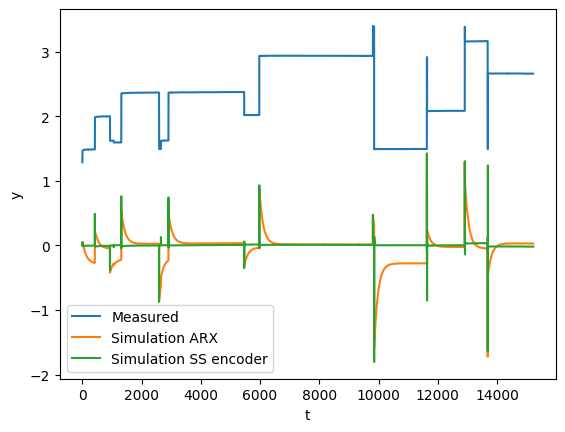

In [35]:
#ARX model
sys_SS_linear = deepSI.fit_systems.Sklearn_io_linear(na=2, nb=5) 
sys_SS_linear.fit(train) #fit the ARX data 
test_simulation_SS_linear = sys_SS_linear.apply_experiment(test)

#Encoder method with neural networks (Beintema, et al. 2020a)
sys_encoder = deepSI.fit_systems.SS_encoder(nx=4, na=10, nb=10) 
#batch optimization using PyTorch for back propagation. 
sys_encoder.fit(train_sys_data=train, val_sys_data=test[:5000], epochs=50, batch_size=256, loss_kwargs={'nf':50})
test_simulation_encoder = sys_encoder.apply_experiment(test)

#plotting the residuals
plt.plot(test.y)
plt.plot(test.y-test_simulation_SS_linear.y)
plt.plot(test.y-test_simulation_encoder.y)
plt.ylabel('y'); plt.xlabel('t'); 
plt.legend(['Measured','Simulation ARX', 'Simulation SS encoder'])
plt.show()

In [36]:
sys_SS_linear = deepSI.fit_systems.Sklearn_io_linear(na=2,nb=2)
sys_SS_linear.fit(train)

# fit_sys_SS = deepSI.fit_systems.SS_linear(nx=3,feedthrough=False) #SS_f = 8
# fit_sys_IO = deepSI.fit_systems.Sklearn_io_linear(na=2,nb=2)

# fit_sys_SS.fit(train, SS_f = 8)
# print(f'SS \tA={fit_sys_SS.A} \n \t B={fit_sys_SS.B}\n\t C={fit_sys_SS.C}\n D={fit_sys_SS.D}') #parameters

# fit_sys_IO.fit(train)
# print(f'ARX paramters: [A,B] = {fit_sys_IO.reg.coef_} offset={fit_sys_IO.reg.intercept_}')  #parameters

0.3969455724105554
0.32598318809176985


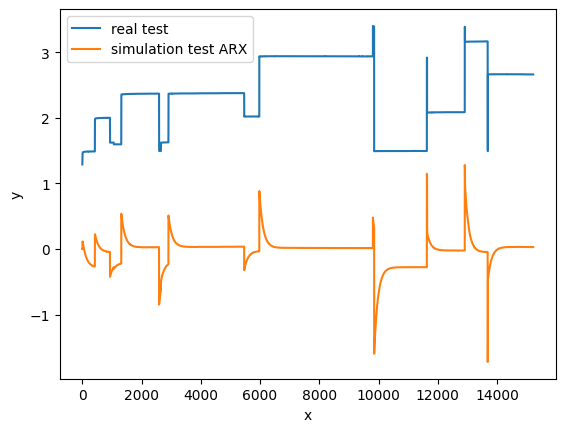

In [37]:
test_simulation_SS_linear = sys_SS_linear.apply_experiment(test)
train_simulation_SS_linear = sys_SS_linear.apply_experiment(train)
print(test_simulation_SS_linear.NRMS(test)) # 0.12984812533409787
print(train_simulation_SS_linear.NRMS(train)) # 0.13541408740489072
plt.plot(test.y)
plt.plot(test.y-test_simulation_SS_linear.y)
plt.ylabel('y'); plt.xlabel('x'); plt.legend(['real test','simulation test ARX'])
plt.show()

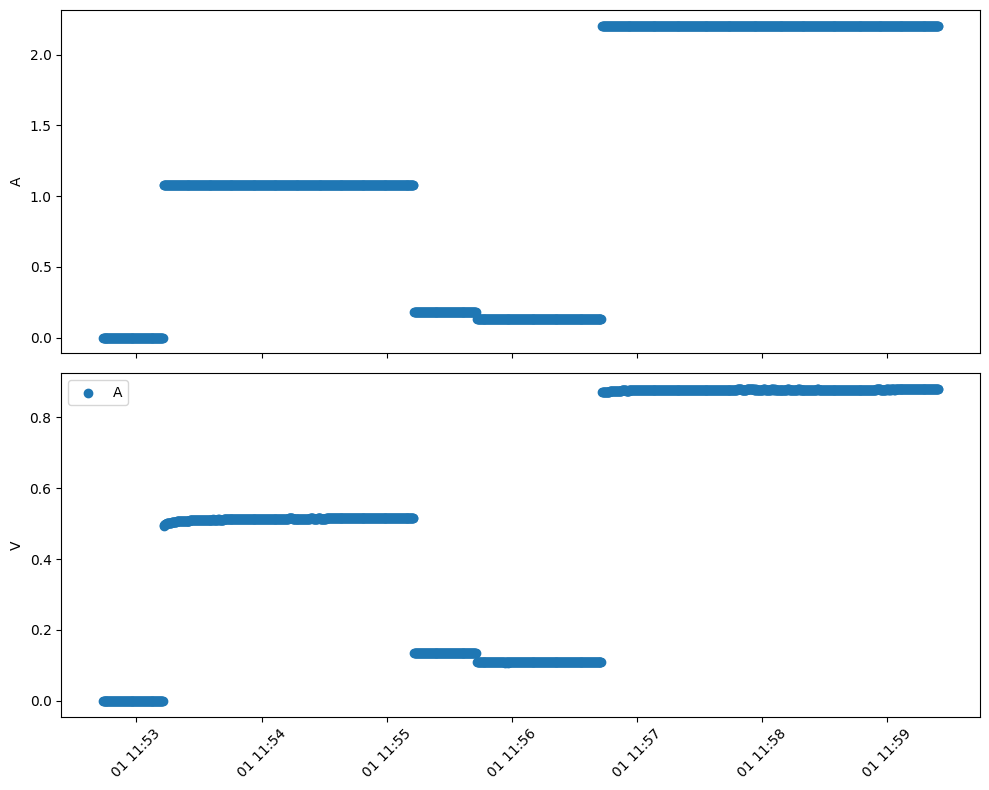

In [38]:
# Define the time range
# start_time = pd.to_datetime('12:22:20.000', format='%H:%M:%S.%f')
# end_time = pd.to_datetime('12:24:30.000', format='%H:%M:%S.%f')

i0 = 300
i1 = 2000
tt = training_data['Time (HH:mm:ss.SSS)'].values[i0:i1]
train_x = training_data['A'].values[i0:i1]  # Input: Current (A)
train_y = training_data['V'].values[i0:i1]  # Output: Voltage (V)

train_x -= train_x[0]
train_y -= train_y[0]

# Plot the filtered data
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 8))

ax1.scatter(tt, train_x)
ax1.set_ylabel('A')

ax2.scatter(tt, train_y)
ax2.set_ylabel('V')
ax2.legend(['A'])


plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




In [39]:
nf = 
nb = 6
nc = 0
nd = 0
na = nf
nk = 0

n_arx = [na, nb, nk]
theta_arx = sid.V_arx_lin_reg(n_arx,train_y,train_x)


n_oe = [nb, nc, nd, nf, nk]

theta_oe_init = np.concatenate((theta_arx[n_arx[0]:n_arx[0]+n_arx[1]],theta_arx[0:n_arx[0]]))  

optimization_results_oe = sp.optimize.least_squares(sid.V_box_jenkins, theta_oe_init, jac=sid.jac_V_bj, args=(n_oe,train_y,train_x))
theta_oe = optimization_results_oe.x

y_hat = sid.y_hat_box_jenkins(theta_oe,n_oe,train_y,train_x)

fig,ax = plt.subplots(1)
ax.plot(tt,train_y)
ax.plot(tt,y_hat)

SyntaxError: invalid syntax (203070651.py, line 1)

In [ ]:
sys_encoder = deepSI.fit_systems.SS_encoder(nx=4, na=10, nb=10)
sys_encoder = deepSI.fit_systems.narx(n)
sys_encoder.fit(train_sys_data=train, val_sys_data=val, epochs=50, batch_size=256, loss_kwargs={'nf':50})
test_simulation_encoder = sys_encoder.apply_experiment(test)
train_simulation_encoder = sys_encoder.apply_experiment(train)
print(train_simulation_encoder.NRMS(train)) # 0.013109197256339526
print(test_simulation_encoder.NRMS(test)) # 0.01563269225510009

In [ ]:
plt.plot(test.y)
plt.plot(test.y-test_simulation_SS_linear.y)
plt.plot(test.y-test_simulation_encoder.y)
plt.ylabel('y'); plt.xlabel('x'); plt.legend(['real test','simulation test ARX', 'simulation test encoder'])
plt.show()

## Exploring other Models

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# --- Data Preprocessing ---
# Reshape the data for scalers (expected 2D input)
train_x = train_x.reshape(-1, 1)
train_y = train_y.reshape(-1, 1)
test_x = test_x.reshape(-1, 1)
test_y = test_y.reshape(-1, 1)
validation_x = validation_x.reshape(-1, 1)
validation_y = validation_y.reshape(-1, 1)

# Scale the data using MinMaxScaler
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

train_x_scaled = scaler_x.fit_transform(train_x)
train_y_scaled = scaler_y.fit_transform(train_y)
test_x_scaled = scaler_x.transform(test_x)
validation_x_scaled = scaler_x.transform(validation_x)

# --- Neural Network Model ---
model = Sequential([
    Dense(64, activation='relu', input_shape=(1,)),  # Input layer
    Dense(32, activation='relu'),                   # Hidden layer
    Dense(1)                                        # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(
    train_x_scaled, train_y_scaled,
    epochs=50, batch_size=32, verbose=1,
    validation_data=(validation_x_scaled, validation_y)
)

# --- Predictions ---
# Predict on the test set
predictions_scaled = model.predict(test_x_scaled)
predictions = scaler_y.inverse_transform(predictions_scaled)

# --- Plot Results ---
plt.figure(figsize=(10, 6))
plt.plot(test_x, test_y, label='Actual Test Data', color='blue')
plt.plot(test_x, predictions, label='Predicted Data', color='red')
plt.xlabel('Current (A)')
plt.ylabel('Voltage (V)')
plt.title('Test Data vs Predictions')
plt.legend()
plt.show()

# --- Evaluate Model ---
test_loss, test_mae = model.evaluate(test_x_scaled, scaler_y.transform(test_y), verbose=1)
print(f"Test Loss (MSE): {test_loss}")
print(f"Test MAE: {test_mae}")


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Select scaler: Min-Max Scaling
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

# Normalize training, validation, and test data
train_x = scaler_x.fit_transform(train_x.reshape(-1, 1))
train_y = scaler_y.fit_transform(train_y.reshape(-1, 1))
validation_x = scaler_x.transform(validation_x.reshape(-1, 1))
validation_y = scaler_y.transform(validation_y.reshape(-1, 1))
test_x = scaler_x.transform(test_x.reshape(-1, 1))
test_y = scaler_y.transform(test_y.reshape(-1, 1))


In [ ]:
import numpy as np

def create_sliding_window(data_x, data_y, window_size):
    x, y = [], []
    for i in range(len(data_x) - window_size):
        x.append(data_x[i:i + window_size])
        y.append(data_y[i + window_size])
    return np.array(x), np.array(y)

window_size = 10
train_x_seq, train_y_seq = create_sliding_window(train_x, train_y, window_size)
validation_x_seq, validation_y_seq = create_sliding_window(validation_x, validation_y, window_size)
test_x_seq, test_y_seq = create_sliding_window(test_x, test_y, window_size)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the LSTM model
model = Sequential([
    LSTM(64, activation='tanh', input_shape=(window_size, 1)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(
    train_x_seq, train_y_seq,
    validation_data=(validation_x_seq, validation_y_seq),
    epochs=50,
    batch_size=32
)


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict on test data
predictions = model.predict(test_x_seq)

# Rescale predictions back to the original scale
predictions_rescaled = scaler_y.inverse_transform(predictions)
test_y_rescaled = scaler_y.inverse_transform(test_y_seq)

# Compute evaluation metrics
mse = mean_squared_error(test_y_rescaled, predictions_rescaled)
mae = mean_absolute_error(test_y_rescaled, predictions_rescaled)
r2 = r2_score(test_y_rescaled, predictions_rescaled)

print(f"MSE: {mse}, MAE: {mae}, R²: {r2}")


In [ ]:
import matplotlib.pyplot as plt

# Simulate response to varying inputs
test_input = np.linspace(-1, 1, 100).reshape(-1, 1)  # Example input pattern
test_input_seq, _ = create_sliding_window(test_input, test_input, window_size)
response = model.predict(test_input_seq)

# Plot the response
plt.plot(test_input[window_size:], response, label='Model Response')
plt.xlabel('Input (Current A)')
plt.ylabel('Output (Voltage V)')
plt.legend()
plt.show()
